## Actividad Final
### Regresión Lineal Simple

### Problema
Construir un modelo que haga predicciones de ventas basado en la invesión financiera de diferentes plataformas de publicidad.

### Datos
Utiliza el conjunto de datos CSV del archivo advertising.csv y analiza la relacion que tienen las diferentes plataformas respecto a las ventas.

### Leyendo y entendiendo los datos

In [12]:
# Importa pandas, numpy 

import pandas as pd
import numpy as np
# Importa scikilearn y métricas
import seaborn as sns

# Importa API's para visualización de datos

import matplotlib.pyplot as plt

In [5]:
# Carga el archivo CSV a una dataframe (DF) y visualiza los primeros
df = pd.read_csv('advertising.csv')


In [2]:
# Visualiza la dimensión del DF

print(df.head())
print ()
print (f'Dimensiones del dataset: {df.shape}')
print (df.info())

In [3]:
# Visualiza la información del DF
print (df.info())


In [4]:
# Visualiza las estadísticas generales del DF
print(df.describe())


### Limpiando los datos

In [5]:
# Busca si existen valores nulos en el DF. Utiliza le método isnull() con la función de agregación sum() 
# para saber la cantidad de nulos por cada variable del DF
print(df.isnull().sum())
print ('filas duplicadas:',df.duplicated().sum())


#### Contesta en esta misma celda: ¿Cuál es tu opinión de acuerdo a los resultados anteriores, para realizar la limpieza de datos?

In [6]:
# Identifica si existen valor atípicos (outliers) en las 3 variables independientes que se estan estudiando. Utilza seaborn
# para realizar las gráficas de caja
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear figuras para los boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de caja para TV
sns.boxplot(y=df['TV'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribución del Gasto en TV')

# Gráfico de caja para Radio
sns.boxplot(y=df['Radio'], ax=axes[1], color='salmon')
axes[1].set_title('Distribución del Gasto en Radio')

# Gráfico de caja para Newspaper
sns.boxplot(y=df['Newspaper'], ax=axes[2], color='lightgreen')
axes[2].set_title('Distribución del Gasto en Newspaper')

# Mostrar los gráficos
plt.show()


#### Contesta en esta misma celda: ¿Existen valores atípicos que realmente afecten el desempeño del entrenamiento? ¿Cómo procederías de acuerdo a tu respuesta anterior?

In [7]:
# Crear un mapa de calor (heatmap) para visualizar la correlación entre las variables independietes y dependiente
# Utiliza seaborn para graficar
plt.figure(figsize=(10, 8))  # Tamaño ajustable
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


#### Contesta en esta misma celda: ¿Cuál es la variable que tiene mayor relación con las ventas?. 

## Constuyendo el modelo

### Importa las librerias sklearn para el split de los datos y el modelo de regesión lineal

In [1]:
# Importa sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
# Crea los conjutnos X y Y para le modelo de regresión lineal simple. Te recomiendo que uses la siguiente nomenclatura 
# Y = df['Sales']

Y = df['Sales']
X = df[['TV']]

In [9]:
# Haz el reshape correspondiente al conjutno X antes de dividir los datos
X = np.array(X).reshape(-1, 1)
#dividir los datos en entrenamiento y prueba, considera el 20% de los datos para testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Instancia el modelo LienarRegression()
model = LinearRegression()
# Entrnea el modelo con el método fit y los conjutnos de entrenamiento (x_train, y_train)
model.fit(X_train, Y_train)
# Imprime la pendiente, bias y coeficientes resultados del entrenamiento
print("Pendiente:", model.coef_[0])
print("Bias:", model.intercept_)
print("Coeficientes:", model.coef_)

Pendiente: 0.0554829439314632
Bias: 7.007108428241848
Coeficientes: [0.05548294]


### Visualiza el desempeño del entrenamiento 

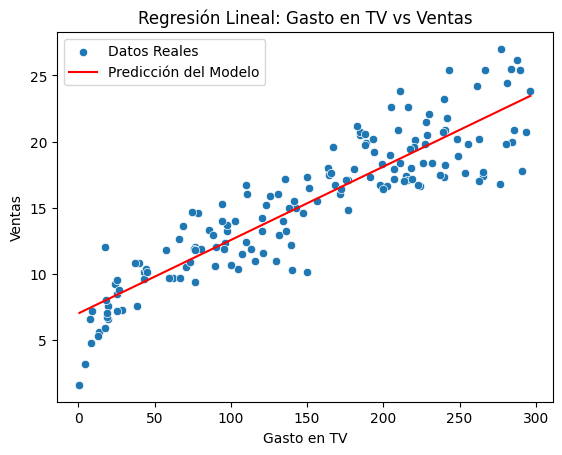

In [13]:
# Redimensiona el conjunto X de entrenamiento


# Realiza la prediccion sobre el conjunto X de entrenamiento
Y_train_pred = model.predict(X_train)
# Con seabor haz una grafica de dispersión para comparar los conjuntos
sns.scatterplot(x=X_train.flatten(), y=Y_train, label="Datos Reales")
sns.lineplot(x=X_train.flatten(), y=Y_train_pred, color='red', label="Predicción del Modelo")
plt.xlabel("Gasto en TV")
plt.ylabel("Ventas")
plt.title("Regresión Lineal: Gasto en TV vs Ventas")
plt.legend()
plt.show()

## Evaluación del modelo

In [14]:
# Importa las métricas mean_squared_error y r2_score

from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Haz la prediccion utilizando el conjunto de prueba
Y_test_pred = model.predict(X_test)
#calculo el error caudratico medio  y R2
mse = mean_squared_error(Y_test, Y_test_pred)
r2 = r2_score(Y_test, Y_test_pred)
print("Error cuadrático medio:", mse)
print("R2 Score:", r2)

Error cuadrático medio: 6.101072906773963
R2 Score: 0.802561303423698
